# 第一章 初识机器学习

本章依赖的python类库有：

- numpy 快速操作结构数组的工具
- pandas 数据分析处理工具
- matplotlib 画图工具
- sklearn 机器学习库
- seaborn 基于matplotlib封装的统计绘图工具
- abupy 开源的量化系统，内含ml_fit机器学习模块，[abupy开源地址](https://github.com/bbfamily/abu)，[abupy环境搭建教程](http://www.abuquant.com/lecture/lecture_0.html)

安装教程见实体书附录A，每个小节可以独立运行。

____

## 1.2 KNN（K-NearestNeighbor K-近邻算法）——相似的邻居请投票

In [1]:
import numpy as np # numpy可以快速操作结构数组

vec1 = np.array([1, 2, 3])
vec2 = np.array([4, 5, 6])
# 欧氏距离
assert np.linalg.norm(vec1 - vec2) == np.sqrt(np.sum(np.square(vec1 - vec2)))

### 鸢尾花卉数据集（IRIS）

#### 训练模型

In [2]:
import numpy as np # 快速操作结构数组的工具
import pandas as pd # 数据分析处理工具
import matplotlib.pyplot as plt # 画图工具
from sklearn import datasets # 机器学习库

#数据集 0-setosa、1-versicolor、2-virginica
scikit_iris = datasets.load_iris()
# 转换成pandas的DataFrame数据格式，方便观察数据
iris = pd.DataFrame(data=np.c_[scikit_iris['data'], scikit_iris['target']],
                     columns=np.append(scikit_iris.feature_names, ['y']))

In [3]:
iris.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0


In [4]:
# 检查数据是否有缺失
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
y                    0
dtype: int64

In [5]:
# 观察样本中按类别数量是否比较均衡
iris.groupby('y').count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
y,,,,
0.0,50,50,50,50
1.0,50,50,50,50
2.0,50,50,50,50


In [6]:
# 选择全部特征训练模型
X = iris[scikit_iris.feature_names]
# label
y = iris['y']

# 第一步，选择model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
# 第二步，fit X、y
knn.fit(X, y)
# 第三步，predict新数据
knn.predict([[3, 2, 2, 5]])

array([ 1.])

#### 分割训练集和测试集

In [8]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics

# 分割训练-测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# K=15
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

y_pred_on_train = knn.predict(X_train)
y_pred_on_test = knn.predict(X_test)
# print(metrics.accuracy_score(y_train, y_pred_on_train))
print('accuracy: ：{}'.format(metrics.accuracy_score(y_test, y_pred_on_test)))

accuracy: ：0.973684210526


### abupy

[开源项目地址](https://github.com/bbfamily/abu)

In [8]:
from abupy import AbuML

# IRIS花卉数据集
iris = AbuML.create_test_fiter()

# 使用KNN
iris.estimator.knn_classifier(n_neighbors=15)

# cross-validation测试
iris.cross_val_accuracy_score()

accuracy mean: 0.973333333333


array([ 0.93333333,  0.93333333,  1.        ,  1.        ,  1.        ,
        0.93333333,  0.93333333,  1.        ,  1.        ,  1.        ])

## 1.3 逻辑分类I：线性分类模型

In [9]:
import numpy as np

def score(x, w, b):
    """线性函数"""
    return np.dot(x, w) + b

In [10]:
def sigmoid(s):
    """sigmoid函数"""
    return 1. / (1 + np.exp(-s))

In [11]:
def softmax(s):
    """softmax函数"""
    return np.exp(s) / np.sum(np.exp(s), axis=0)

#### 体验softmax

1\.

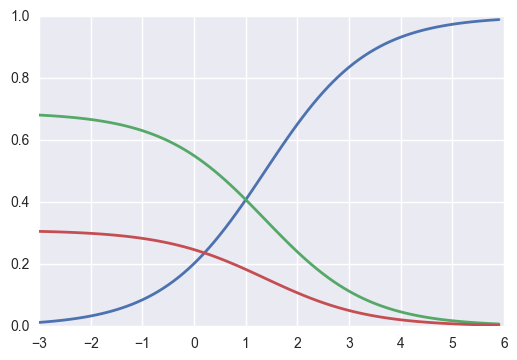

In [12]:
%matplotlib inline 
import matplotlib.pyplot as plt
# seaborn是一个matplotlib之上封装统计plot类库，这里我们只是使用seaborn的样式定义
import seaborn as sns

x = np.arange(-3.0, 6.0, 0.1)
scores = np.vstack([x, np.ones_like(x), 0.2*np.ones_like(x)])
plt.plot(x, softmax(scores).T, linewidth=2)

2\.

In [13]:
scores = np.array([2.0, 1.0, 0.1])
print(softmax(scores))
print(softmax(scores * 100))
print(softmax(scores / 100))

[ 0.65900114  0.24243297  0.09856589]
[  1.00000000e+00   3.72007598e-44   3.04823495e-83]
[ 0.33656104  0.33321221  0.33022675]


In [14]:
# y是真实标签，p是预测概率
def cross_entropy(y, p):
    """交叉熵"""
    return np.sum(y * np.log(p) + (1 - y) * np.log(1 - p, axis=1))

## 1.4 逻辑分类II：线性分类模型

### 寻找模型的权重

In [1]:
import numpy as np

# 函数y = 1*x^2 + 0*x + 0
y = np.poly1d([1, 0, 0])
y(-7)

49

In [2]:
# d_yx：导函数
d_yx = np.polyder(y)
d_yx(-7)

-14

1\.

In [3]:
import random

# 随机选一个起点 
x_0 = random.uniform(-10, 10)
y_0 = random.uniform(-10, 10)
x_0, y_0

(9.747821445673942, -6.677339057547695)

2\.

In [4]:
def step(x, d_yx):
    alpha = .2
    return x - alpha*d_yx(x)
step(x_0, d_yx)

5.848692867404365

3\. 

In [5]:
x = x_0
x_list = [x]
for i in range(10):
    x = step(x, d_yx)
    x_list.append(x)
x_list

[9.747821445673942,
 5.848692867404365,
 3.5092157204426191,
 2.1055294322655715,
 1.2633176593593429,
 0.75799059561560578,
 0.45479435736936347,
 0.27287661442161804,
 0.16372596865297082,
 0.098235581191782481,
 0.058941348715069487]

### 去均值与归一化

In [6]:
# 均值
x = np.array([1, 2, 3, 4, 5])
assert np.mean(x) == np.sum(x) / 5

In [7]:
# 方差
assert np.std(x) == np.sqrt(np.mean((x - np.mean(x))**2))

In [8]:
# 两条特征向量
f1 = np.array([0.2, 0.5, 1.1]).reshape(-1, 1)
f2 = np.array([-100.0, 56.0, -77.0]).reshape(-1, 1)

# 计算归一化
f1_scaled = (f1 - np.mean(f1)) / np.std(f1)
f2_scaled = (f2 - np.mean(f2)) / np.std(f2)

# 用sklearn封装的函数计算归一化
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
f1_sk_scaled = scaler.fit_transform(f1)
f2_sk_scaled = scaler.fit_transform(f2)

assert np.allclose(f1_sk_scaled, f1_scaled) and np.allclose(f2_sk_scaled, f2_scaled)

### 实现

In [9]:
from abupy import AbuML
import sklearn.preprocessing as preprocessing

# IRIS花卉数据集
iris = AbuML.create_test_fiter()

# 使用逻辑分类，损失函数指定为交叉熵
iris.estimator.logistic_classifier(multi_class='multinomial', solver='lbfgs')

# cross-validation测试
iris.cross_val_accuracy_score()

only use pandas calc nd, please install talib!
/Users/maxmon/anaconda2/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
accuracy mean: 0.973333333333


array([ 1.        ,  0.93333333,  1.        ,  1.        ,  0.93333333,
        0.93333333,  0.93333333,  1.        ,  1.        ,  1.        ])